#### Internship Project
#### abuhaider2011@gmail.com
#### Mob: 7259902029

#### Importing The Important Libraries

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the xlsx file

In [362]:
file = 'DA-1.xlsx'
# Load spreadsheet
x = pd.ExcelFile(file)

In [363]:
# Load a sheet into a DataFrame by name: df1
df1 = x.parse('SampleData1')

In [364]:
df1.head(5)

,Id,Type,Date,CountA,CountB,CountC,FeedBack
1,10121,Email,2016-08-04 10:16:47,0.773005,0.662162,0.622776,Others
2,10122,Email,2016-08-04 10:18:28,0.193826,0.870958,0.328081,Others
3,10123,Email,2016-08-04 10:30:24,0.772299,0.322429,0.456233,Others
4,10124,Email,2016-08-04 10:41:56,0.485769,0.128755,0.575060,Others
5,10125,Email,2016-08-04 10:59:00,0.015268,0.216612,0.098125,Others


In [365]:
df2 = x.parse('SampleData2')

In [366]:
df2.head(5)

,Id,User
1,10121,A1005
2,10122,A1002
3,10123,A1002
4,10124,A1002
5,10125,A1002


#### Merging the two dataset on key(Id)

In [367]:
df=pd.merge(df1, df2, on='Id')

In [368]:
df.head(5)

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
0,10121,Email,2016-08-04 10:16:47,0.773005,0.662162,0.622776,Others,A1005
1,10122,Email,2016-08-04 10:18:28,0.193826,0.870958,0.328081,Others,A1002
2,10123,Email,2016-08-04 10:30:24,0.772299,0.322429,0.456233,Others,A1002
3,10124,Email,2016-08-04 10:41:56,0.485769,0.128755,0.575060,Others,A1002
4,10125,Email,2016-08-04 10:59:00,0.015268,0.216612,0.098125,Others,A1002


In [369]:
print(len(df))

66


#### Data Structure

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 8 columns):
Id          66 non-null int64
Type        64 non-null object
Date        66 non-null datetime64[ns]
CountA      66 non-null float64
CountB      66 non-null float64
CountC      66 non-null float64
FeedBack    64 non-null object
User        66 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 4.6+ KB


In [371]:
df.isnull().sum()

Id          0
Type        2
Date        0
CountA      0
CountB      0
CountC      0
FeedBack    2
User        0
dtype: int64

#### percentage of missing values

In [372]:
def perc_missing(x):
    return(x.isnull().sum()/len(x)*100)

In [373]:
perc_missing(df)

Id          0.000000
Type        3.030303
Date        0.000000
CountA      0.000000
CountB      0.000000
CountC      0.000000
FeedBack    3.030303
User        0.000000
dtype: float64

#### Graphically Visualization of missing column

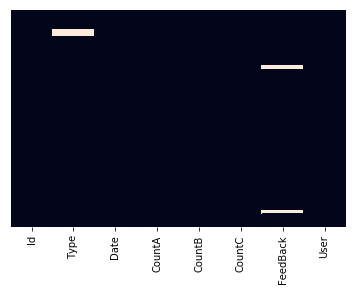

In [374]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#### Explanatory Data Analysis

In [375]:
df.columns

Index(['Id', 'Type', 'Date', 'CountA', 'CountB', 'CountC', 'FeedBack', 'User'], dtype='object')

#### Data Description For Continous Variable

In [376]:
df[['CountA', 'CountB', 'CountC']].describe().T

,count,mean,std,min,25%,50%,75%,max
CountA,66.0,0.449231,0.288190,0.006013,0.221218,0.448362,0.721173,0.981381
CountB,66.0,0.487495,0.308335,0.001177,0.217050,0.544847,0.723734,0.979509
CountC,66.0,0.425085,0.270263,0.006691,0.209038,0.408826,0.641617,0.976614


Observation

We observe from the above table & plot:

For the following variables mean is almost equal to the 50% percentile or median indicating a possible normal distribution and the histogram to be symmetrical:

1) CountA 2) CountC

For the following variables mean is less than the 50% percentile or median indicating the distribution is skewed to the left:

1) CountB


/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for CountC')

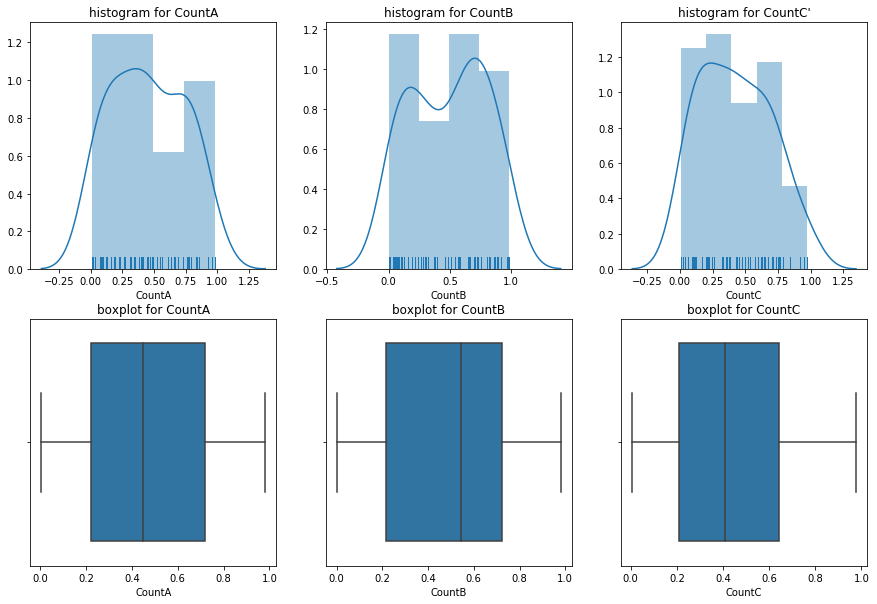

In [377]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(df['CountA'],rug=True)
plt.title("histogram for CountA")
plt.subplot(234)
sns.boxplot(df.CountA)
plt.title("boxplot for CountA")

plt.subplot(232)
sns.distplot(df['CountB'],rug=True)
plt.title("histogram for CountB")
plt.subplot(235)
sns.boxplot(df.CountB)
plt.title("boxplot for CountB")


plt.subplot(233)
sns.distplot(df['CountC'],rug=True)
plt.title("histogram for CountC'")
plt.subplot(236)
sns.boxplot(df.CountC)
plt.title("boxplot for CountC")

Observation

1)The shape of the CountA histogram looks almost normal distribution with no outliers

2)The shape of the CounB histogram looks slightly skewed to the left with no outliers.

3)The shape of the CountC histogram looks normal distribution with no outliers.


#### Data Description For Categorical Variable

In [378]:
df.describe(include = [np.object]).T

,count,unique,top,freq
Type,64,4,Update,37
FeedBack,64,8,Others,29
User,66,5,A1003,22


In [379]:
df.FeedBack.unique()

array(['Others', 'UNDECIDED', 'NC', nan, 'nc', 'NI', 'Undecided',
       'undecided ', 'undecided'], dtype=object)

In [380]:
df['FeedBack'].replace(['Undecided','undecided','undecided '],['UNDECIDED','UNDECIDED','UNDECIDED'],inplace=True)

In [381]:
df['FeedBack'].replace('nc','NC',inplace=True)

In [382]:
df.FeedBack.unique()

array(['Others', 'UNDECIDED', 'NC', nan, 'NI'], dtype=object)

In [383]:
df.User.unique()

array(['A1005', 'A1002', 'A1001', 'A1003', 'A1004'], dtype=object)

#### Changing User Variables into (A,B,C,D ) Users

In [384]:
df['User'].replace(['A1005', 'A1002', 'A1001', 'A1003', 'A1004'],['UserE', 'UserB', 'UserA', 'UserC', 'UserD'],inplace=True)

In [385]:
df.User.unique()

array(['UserE', 'UserB', 'UserA', 'UserC', 'UserD'], dtype=object)

In [386]:
df.head()

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
0,10121,Email,2016-08-04 10:16:47,0.773005,0.662162,0.622776,Others,UserE
1,10122,Email,2016-08-04 10:18:28,0.193826,0.870958,0.328081,Others,UserB
2,10123,Email,2016-08-04 10:30:24,0.772299,0.322429,0.456233,Others,UserB
3,10124,Email,2016-08-04 10:41:56,0.485769,0.128755,0.575060,Others,UserB
4,10125,Email,2016-08-04 10:59:00,0.015268,0.216612,0.098125,Others,UserB


### Treatment Of Missing Values & Unwanted Column

In [387]:

#### Replacing the missing value in Variable 'TYPE' With Its Mode.
df['Type']=df['Type'].fillna(value=df['Type'].mode()[0])

    



In [388]:
### Dropping the missing Values From The Target Variable "FeedBack"
data_no_missing = df.dropna()

In [389]:
data_no_missing.isnull().sum()

Id          0
Type        0
Date        0
CountA      0
CountB      0
CountC      0
FeedBack    0
User        0
dtype: int64

In [390]:
data_no_missing.head()

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
0,10121,Email,2016-08-04 10:16:47,0.773005,0.662162,0.622776,Others,UserE
1,10122,Email,2016-08-04 10:18:28,0.193826,0.870958,0.328081,Others,UserB
2,10123,Email,2016-08-04 10:30:24,0.772299,0.322429,0.456233,Others,UserB
3,10124,Email,2016-08-04 10:41:56,0.485769,0.128755,0.575060,Others,UserB
4,10125,Email,2016-08-04 10:59:00,0.015268,0.216612,0.098125,Others,UserB


In [391]:
### Remove unwanted column "Id ","Date"

data_clean_1=data_no_missing.drop(['Id'], axis = 1)

In [392]:
data_clean_1.head()

,Type,Date,CountA,CountB,CountC,FeedBack,User
0,Email,2016-08-04 10:16:47,0.773005,0.662162,0.622776,Others,UserE
1,Email,2016-08-04 10:18:28,0.193826,0.870958,0.328081,Others,UserB
2,Email,2016-08-04 10:30:24,0.772299,0.322429,0.456233,Others,UserB
3,Email,2016-08-04 10:41:56,0.485769,0.128755,0.575060,Others,UserB
4,Email,2016-08-04 10:59:00,0.015268,0.216612,0.098125,Others,UserB


In [393]:
data_clean      = data_clean_1.drop(['Date'], axis = 1)

In [394]:
data_clean.head()

,Type,CountA,CountB,CountC,FeedBack,User
0,Email,0.773005,0.662162,0.622776,Others,UserE
1,Email,0.193826,0.870958,0.328081,Others,UserB
2,Email,0.772299,0.322429,0.456233,Others,UserB
3,Email,0.485769,0.128755,0.575060,Others,UserB
4,Email,0.015268,0.216612,0.098125,Others,UserB


we need to convert the following variables into categorical variables:
> Type

> FeedBack

> User


In [395]:
data_clean['Type']      = data_clean.Type.astype("category")
data_clean['FeedBack']  = data_clean.FeedBack.astype("category")
data_clean['User']      = data_clean.User.astype("category")


In [396]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 65
Data columns (total 6 columns):
Type        64 non-null category
CountA      64 non-null float64
CountB      64 non-null float64
CountC      64 non-null float64
FeedBack    64 non-null category
User        64 non-null category
dtypes: category(3), float64(3)
memory usage: 2.8 KB


Grouped Bar Chart For Categorical Variables

Input:

1) Data Frame

2) Column name of the predictor variable selected

3) Label for the predictor variable

4) Title for the grouped bar chart

Output:

1) Cross tab with count and row percentages

2) Grouped Bar chart


In [397]:
def draw_barplot(df, X, xlab, title):
    
    x       =   df[X]
    AHD     =   df['FeedBack']

    ct = pd.crosstab(df[X], df['FeedBack'])
    print("\n Cross tab with count\n")
    print(ct)

    ### Cross tab with row percentages
    print("\n Cross tab with row % \n")
    ct1 = pd.crosstab(df[X], df['FeedBack'], normalize='index').round(4)*100
    print(ct1)

    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    ax = sns.barplot(x = stacked[X], y = stacked.value, hue=stacked.FeedBack)
    ax.set_title(title)    
    plt.show()


#### Cross tab - Type Vs FeedBack


 Cross tab with count

FeedBack  NC  NI  Others  UNDECIDED
Type                               
Email      0   0      19          0
Update    28   0       3          6
Call       0   0       7          0
Visit      0   1       0          0

 Cross tab with row % 

FeedBack     NC     NI  Others  UNDECIDED
Type                                     
Email      0.00    0.0  100.00       0.00
Update    75.68    0.0    8.11      16.22
Call       0.00    0.0  100.00       0.00
Visit      0.00  100.0    0.00       0.00


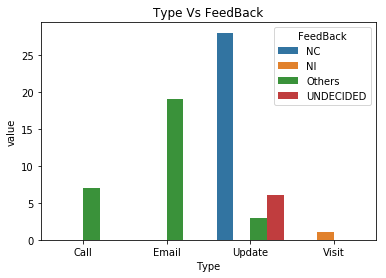

In [398]:
draw_barplot(data_clean, 'Type','Type-Of-Communications', 'Type Vs FeedBack')


Observation
We observe that for the following mode of communication:

 1) Call   (7)     - FeedBack (Others)
 
 2) Email  (19)    - FeedBack (Others)
 
 3) Update (28)    - FeedBack (NC:No contact)
 
   Update  (1)     - FeedBack (Others)
   
   Update  (6)     - FeedBack (UNDECIDED)
   
   
   
 4) Visit  (1)     - FeedBack (NI :Not Interested)


#### Cross tab - User Vs FeedBack


 Cross tab with count

FeedBack  NC  NI  Others  UNDECIDED
User                               
UserE      0   0       3          0
UserB      0   0      13          1
UserA      9   1       6          2
UserC     16   0       3          2
UserD      3   0       4          1

 Cross tab with row % 

FeedBack     NC    NI  Others  UNDECIDED
User                                    
UserE      0.00  0.00  100.00       0.00
UserB      0.00  0.00   92.86       7.14
UserA     50.00  5.56   33.33      11.11
UserC     76.19  0.00   14.29       9.52
UserD     37.50  0.00   50.00      12.50


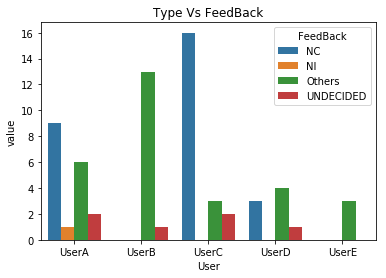

In [399]:
draw_barplot(data_clean, 'User','Different-Users', 'Type Vs FeedBack')

#### Observation
From UserC highest number of FeedBack has been recorded out of which (NC: No Contact) was the heighest among all the
Users.

From UserE lowest number of FeedBack has been recorded compare to other Users and the FeedBack got is 'Others'.

In [400]:
def draw_barplot(df, X, xlab, title):
    
    x       =   df[X]
    AHD     =   df['Type']

    ct = pd.crosstab(df[X], df['Type'])
    print("\n Cross tab with count\n")
    print(ct)

    ### Cross tab with row percentages
    print("\n Cross tab with row % \n")
    ct1 = pd.crosstab(df[X], df['Type'], normalize='index').round(4)*100
    print(ct1)

    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    ax = sns.barplot(x = stacked[X], y = stacked.value, hue=stacked.Type)
    ax.set_title(title)    
    plt.show()



 Cross tab with count

Type   Call  Email  Update  Visit
User                             
UserE     0      3       0      0
UserB     0     10       4      0
UserA     3      3      11      1
UserC     1      2      18      0
UserD     3      1       4      0

 Cross tab with row % 

Type    Call   Email  Update  Visit
User                               
UserE   0.00  100.00    0.00   0.00
UserB   0.00   71.43   28.57   0.00
UserA  16.67   16.67   61.11   5.56
UserC   4.76    9.52   85.71   0.00
UserD  37.50   12.50   50.00   0.00


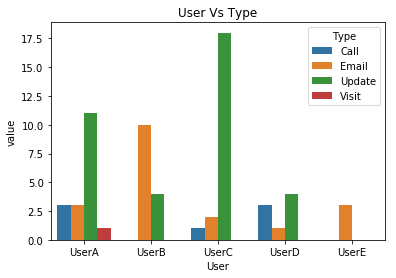

In [401]:
draw_barplot(data_clean, 'User','Different-Users', 'User Vs Type')

Observation

UserA & UserC have been communicated the most and the maximum type of communication was "Update".

UserE has been communicated least and the type of communication was an 'Email'.


### Finding the correlation betwwen the continous Variables

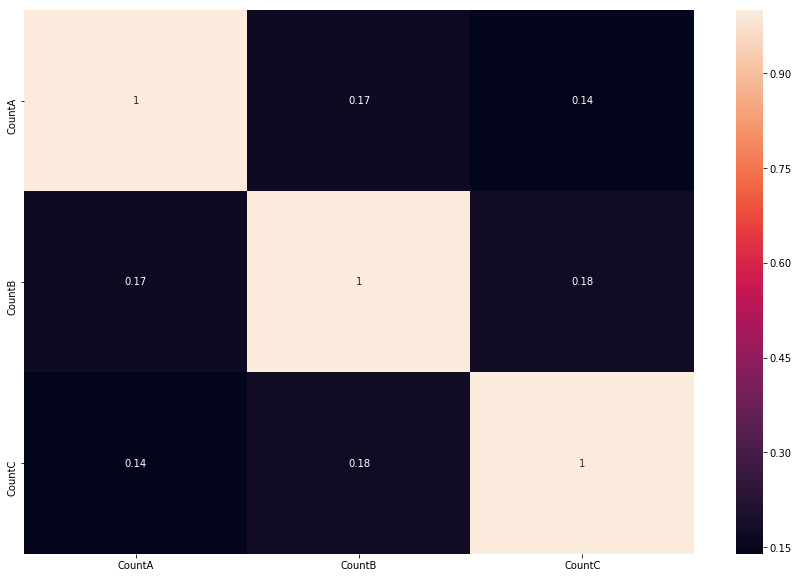

In [402]:
plt.figure(figsize=(15,10));
sns.heatmap(data_clean[['CountA', 'CountB', 'CountC']].corr(), annot=True);

Observation

From the corelation matrix it is clear that non of the continous variable corelated with each other.


In [403]:
data_clean.FeedBack.unique()

[Others, UNDECIDED, NC, NI]
Categories (4, object): [Others, UNDECIDED, NC, NI]


####  Converting target / dependent [Others, UNDECIDED, NC, NI] variable to be continous variable [0, 1, 2, 3]



In [404]:
data         = data_clean
data['FeedBack']  = data.FeedBack.replace(['Others', 'UNDECIDED','NC','NI'], [0, 1,2,3])

In [405]:
data.FeedBack.unique()

array([0, 1, 2, 3])

#### Encoding categorical Variables

In [406]:
x=pd.get_dummies(data[['Type','CountA', 'CountB', 'CountC', 'User']],drop_first=True)

In [407]:
y=data[['FeedBack']]

#### Split the dataset into Train & Test

In [408]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 56 )



In [409]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(44, 10) (44, 1)
(20, 10) (20, 1)


In [410]:
## Building the Classifier
## Importing the Classification Tree Package
from sklearn import tree

In [411]:
## Creating the Classifier Object
clf = tree.DecisionTreeClassifier()

In [412]:
## Fitting the Classification Tree on Training Dataset
clf = clf.fit(x_train, y_train)


In [413]:
feature_importance = pd.DataFrame([x_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance.T .head(20)


,0,1
0,CountA,0.0804762
1,CountB,0.0714286
2,CountC,0.11
3,Type_Email,0
4,Type_Update,0.613187
5,Type_Visit,0
6,User_UserB,0.124908
7,User_UserC,0
8,User_UserD,0
9,User_UserE,0


#### Visualize the tree

In [414]:
import pydotplus
import io
from sklearn.tree import export_graphviz
from scipy import misc
from matplotlib import pyplot as plt
feature_list = list(x_train.columns.values)
f = io.StringIO()
dot_data = export_graphviz(clf, out_file = f,
                feature_names=feature_list)
pydot_graph = pydotplus.graph_from_dot_data(f.getvalue())

/Users/sanaam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


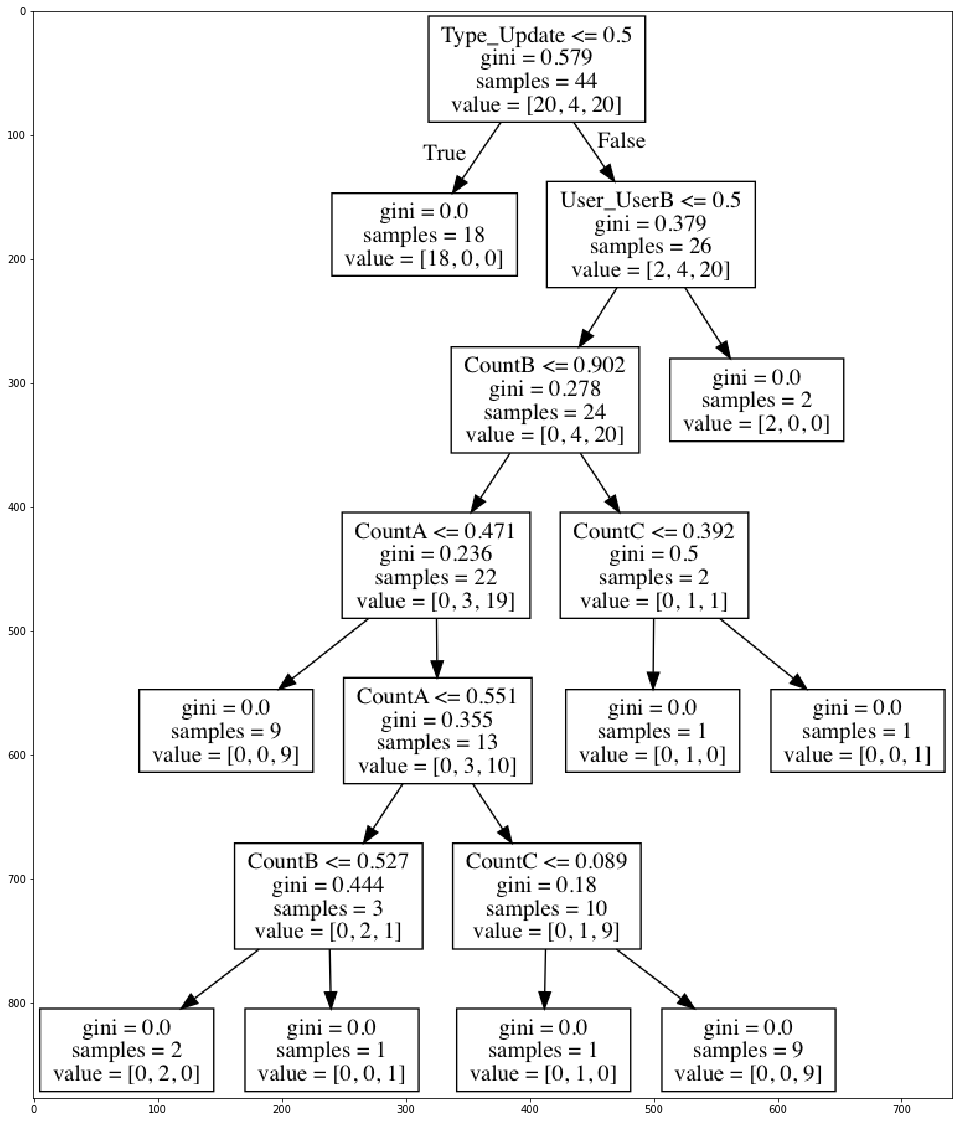

In [415]:
pydot_graph.write_png("decision_tree.png")
img = misc.imread("decision_tree.png")
plt.rcParams["figure.figsize"]=(20,20)
plt.imshow(img)


In [416]:
data.columns


Index(['Type', 'CountA', 'CountB', 'CountC', 'FeedBack', 'User'], dtype='object')

In [417]:
pred_y_train = clf.predict(x_train)
pred_y_train

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2])

In [418]:
## Predict based on the Classifier
pred_y_test = clf.predict(x_test)
pred_y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0])

In [419]:
## Let us see the classification accuracy of our model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred_y_test)
score

0.85

#### Accuracy of our model is 85 %